### Броуновское движение
**Броуновское движение** — это явление, при котором частицы в, казалось бы, неподвижной среде хаотично двежутся, подвергаясь  беспорядочным столкновениям.

Впервые это явленеие было описано Робертом Брауном в 1827 году. В 1923 году Норберт Винер сформулировать его в математических терминах (Винеровский процесс).

Рассмотрим одномерную систему координат. В начальный момент времени частица находится в начале координат ($x=0$). В процессе эволюции системы ($t>0$) частица может претерпевать случайные столкновения вдоль оси $OX$.

Пусть $X(t)$ - положение частицы в момент времени $t$ ($X(0)=0$).  Когда частица подвергается столкновению, говорят, что произошло событие. Из физических наблюдений было установлено, что  события, произошедшие в любые два равные интервала времени, например $[s,t]$ и $[s+h, t+h]$, не только равновероятны, но и независимы. 

Это означает, что $\Delta X(t) = X(t) - X(s) \sim \Delta X(t+h) = X(t+h) - X(s+h)$, то есть приращения стационарны и независимы. Это основа броуновского движения.

Для $t>s>0$ предполагается, что прращения  $\Delta X(t) = X(t) - X(s)$ распределены согласно нормальному закону $N(0, \sigma^{2} (t - s)$).

Тогда
$$ X(t_1) = X(t_0) + \Delta X(t_1), \Delta X(t_1) \sim N(0, dt \cdot \sigma^2)$$
$$ X(t_2) = X(t_1) + \Delta X(t_2), \Delta X(t_2) \sim N(0, dt \cdot \sigma^2)$$
$$ ... $$


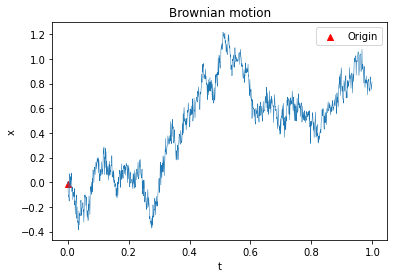

In [24]:
from math import sqrt, exp
from random import random, gauss
import numpy as np
import matplotlib.pyplot as plt

mean = 0
std = 1  

N = 1000    
dt = 1/N    

data = []
x = 0
for t in range(N):
    dx = gauss(mean, std*sqrt(dt)) 
    x = x + dx                      
    data.append((dt*t, x+dx))

data = np.array(data)

plt.figure()
plt.plot(data[:, 0], data[:, 1], linewidth=0.5)
plt.scatter(data[0, 0], data[0, 1],marker="^",color='r',label="Origin")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("Brownian motion")
plt.show()

### Двумерная реализация

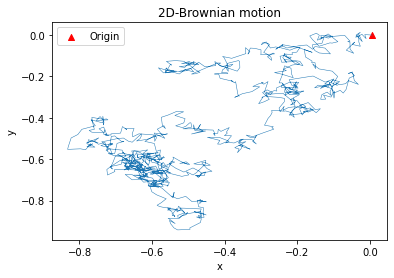

In [29]:
mean = 0
std = random()

N = 1000    
dt = 1/N   

data = []
x, y = 0, 0
for t in range(N):
    dx = gauss(mean, std*sqrt(dt))
    dy = gauss(mean, std*sqrt(dt))
    x, y = x+dx, y+dy
    data.append((x, y))

data = np.array(data)

plt.figure()
plt.plot(data[:, 0], data[:, 1], linewidth=0.5)
plt.scatter(data[0, 0], data[0, 1],marker="^",color='r',label="Origin")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title("2D-Brownian motion")
plt.show()

### Диффузия 1D

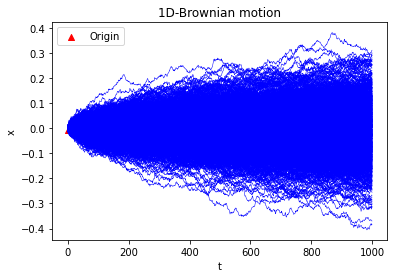

In [31]:
plt.figure()

mean = 0
std = random()

N = 1000    
dt = 1/N    

NP = 1000
for i in range(NP):
    data = []
    x = 0
    for t in range(N):
        dx = gauss(mean, std*sqrt(dt))    
        x = x+dx
        data.append((t, x))

    data = np.array(data)


    plt.plot(data[:, 0], data[:, 1], 'b-', linewidth=0.5)
plt.scatter(data[0, 0], data[0, 1],marker="^",color='r',label="Origin")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("1D-Brownian motion")
plt.show()

1000


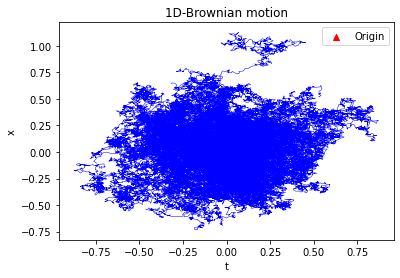

In [36]:
plt.figure()

mean = 0
std = random()

N = 1000    # generate N points
dt = 1/N    # time interval = [0,1]

data = []

NP = 100
for i in range(NP):
    data.append([])    
    x, y = 0, 0
    for t in range(N):
        dx = gauss(mean, std*sqrt(dt))   
        dy = gauss(mean, std*sqrt(dt))    
        x = x+dx
        y = y+dy
        data[-1].append((x, y))
    data[-1] = np.array(data[-1])

    plt.plot(data[-1][:, 0], data[-1][:, 1], 'b-', linewidth=0.5)

plt.scatter(data[0][0, 0], data[0][0, 1],marker="^",color='r',label="Origin")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.title("1D-Brownian motion")
plt.show()

### Анимация

MovieWriter ffmpeg unavailable; using Pillow instead.


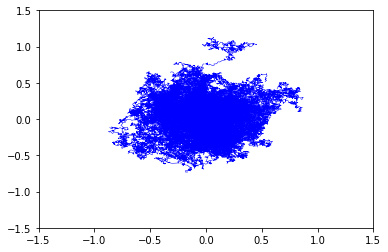

In [45]:
import matplotlib.pyplot as plt
from matplotlib import animation

fig = plt.figure()
ax = plt.gca()
ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-1.5, 1.5])

NFrames = len(data[0]) // 20

def init():
    X = [0]
    Y = [0]
    plt.scatter(data[0][0, 0], data[0][0, 1],marker="^",color='r',label="Origin")        
        
    
def animate(i):    
    if i < NFrames: 
        K = i * 20       
        for p in range(NP):
            X = data[p][K: K + 20, 0]
            Y = data[p][K: K + 20, 1]
            plt.plot(X, Y, 'b-', linewidth=0.5)            

anim = animation.FuncAnimation(fig, animate, init_func=init, frames= NFrames + 5, repeat = False, interval=500)
anim.save('plot.gif')

![SegmentLocal](plot.gif "segment")